In [1]:
import arff
import numpy as np
from scipy import sparse
decoder = arff.ArffDecoder()
d = decoder.decode(open('rcv1subset1-train.arff', 'r'), encode_nominal=True, return_type=arff.COO)
data = d['data'][0]
row = d['data'][1]
col = d['data'][2]
matrix = sparse.coo_matrix((data, (row, col)), shape=(max(row)+1, 47337)) # the COO format is also called the ijv format. 
d = decoder.decode(open('rcv1subset1-test.arff', 'r'), encode_nominal=True, return_type=arff.COO)
data = d['data'][0]
row = d['data'][1]
col = d['data'][2]
test_matrix = sparse.coo_matrix((data, (row, col)), shape=(max(row)+1, 47337)) # for the test set, the last column is blank, so we cannot simply infer size from maximum column index

In [2]:
len(np.unique(col))

15635

In [3]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import hamming_loss, accuracy_score, f1_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

use_svd = True

logit = LogisticRegression()
features = matrix.tocsr()[:,0:47236].A
labels = matrix.tocsr()[:,47236:].A # exclude the last label because it does not appear in test set
test_features = test_matrix.tocsr()[:,0:47236].A
# exclude the last label because it does not appear in test set, also include 47235 because 
# test dataset from rcv1 subset 1 from Mulan has 47235 as a label (i.e. Mulan test file has one feature missing)
test_labels = test_matrix.tocsr()[:,47235:-1].A

if(use_svd):
    svd = TruncatedSVD(50)
    features = svd.fit_transform(features)
    test_features = svd.transform(test_features)
clf = MultiOutputRegressor(logit).fit(features, labels)
prediction = clf.predict(test_features)

print(log_loss(test_labels,prediction))
print('Micro f1: '+str(f1_score(test_labels,prediction,average='micro')))
print('Macro f1: '+str(f1_score(test_labels,prediction,average='macro')))
print('Weighted f1: '+str(f1_score(test_labels,prediction,average='weighted')))
print('Sample f1: '+str(f1_score(test_labels,prediction,average='samples')))
print('Accuracy: '+str(accuracy_score(test_labels,prediction)))
print('Hamming Loss: '+str(hamming_loss(test_labels,prediction)))


48.756616318348755
Micro f1: 0.49408537630721755
Macro f1: 0.08370811123068043


c:\users\david\anaconda3\envs\graphenv\lib\site-packages\sklearn\metrics\_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
c:\users\david\anaconda3\envs\graphenv\lib\site-packages\sklearn\metrics\_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


Weighted f1: 0.4036055092415136
Sample f1: 0.4596756613756614
Accuracy: 0.16
Hamming Loss: 0.019478547854785477


In [5]:
features.shape

(3000, 50)

[  0  64  63  62  61  60  57  56  65  55  53  52  51  49  48  47  46  54
  66  67  68  91  90  89  87  85  84  83  81  80  79  78  77  76  75  74
  73  71  42  41  50  39  22  21  20  19  18  40  17  16  15  14  13  12
  11   9   7   2   1  23  24 100  26  35  34  25  33  36  31  29  28  27
  38  30  37  44  59  72   5  70  10  88  99  93   8  86   6  82  45  95
  96  43  92  98  94  58   4  97   3  69  32]
[100  48  79  68  41  49  76  40  24  56  38  87  42  65  80  39  47  27
  35  66  55  62  53  64  46  19  91  25  11  51   7  84  81  61  67  60
  28  12  22  83  23  15  74  37  85  18  57  36  90  77  33  89  63   2
  71  16  54  31  30  75  73  29  10  99   0   5  26  78  50   9  52  44
  59  17  45  34  88  20  70  72  93  95  96  21   8  86   1  43  14  82
  98  92  13   6  94   4  97  58   3  69  32]


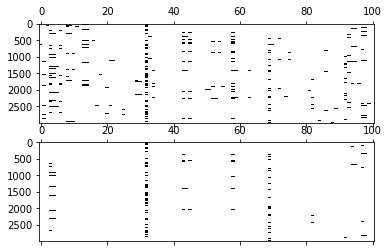

In [106]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.spy(test_labels,aspect='auto')
plt.subplot(212)
plt.spy(prediction,aspect='auto')
np.count_nonzero(test_labels)
print(np.argsort(np.sum(prediction,0)))
print(np.argsort(np.sum(test_labels,0)))

In [117]:
np.count_nonzero(test_matrix.tocsr()[:,47336].A)

0

In [118]:
labels.shape

(3000, 101)

In [13]:
matrix.tocsr()[:,0:47236].A[0]

array([0., 0., 0., ..., 0., 0., 0.])